In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-11-20 20:16:35.548517: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from statistics import median, stdev, mean

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from tensorflow.keras import datasets, layers, models

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

In [7]:
train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [8]:
test_ds = train_gen.flow_from_directory(
    './test',
    target_size=(150,150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [9]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [12]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'model_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = keras.optimizers.SGD(lr=0.002, momentum=0.8)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

2022-11-20 20:19:52.892226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 20:19:52.898533: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 20:19:52.899145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 20:19:52.900161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
model.output_shape

(None, 1)

### Q1 Since we have a binary classification problem, what is the best loss function for us?
A: binary crossentropy

### Q2 What's the total number of parameters of the model? 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [16]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds,
                    callbacks=[chechpoint])

Epoch 1/10
80/80 [==============================] - 10s 127ms/step - loss: 0.6021 - accuracy: 0.6662 - val_loss: 0.4771 - val_accuracy: 0.8426
Epoch 2/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4317 - accuracy: 0.8225 - val_loss: 0.3749 - val_accuracy: 0.8401
Epoch 3/10
80/80 [==============================] - 9s 108ms/step - loss: 0.3558 - accuracy: 0.8657 - val_loss: 0.3711 - val_accuracy: 0.8553
Epoch 4/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3096 - accuracy: 0.8802 - val_loss: 0.3501 - val_accuracy: 0.8325
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2679 - accuracy: 0.8915 - val_loss: 0.3090 - val_accuracy: 0.8553
Epoch 6/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2247 - accuracy: 0.9260 - val_loss: 0.2836 - val_accuracy: 0.8909
Epoch 7/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2017 - accuracy: 0.9316 - val_loss: 0.2872 - val_accuracy: 0.8807
Epoch

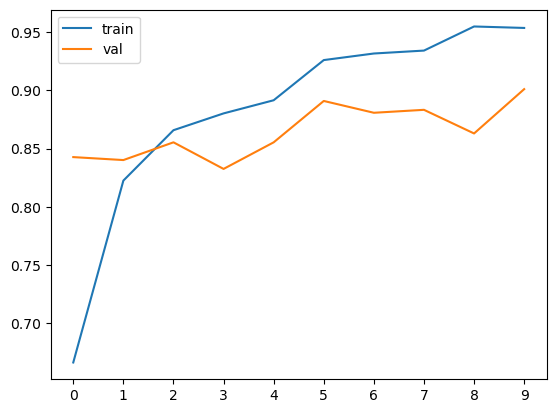

In [17]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Q3 What is the median of training accuracy for all the epochs for this model?

In [18]:
median_train = median(history.history['accuracy'])
round(median_train, 2)

0.91

### Q4 What is the standard deviation of training loss for all the epochs for this model?

In [19]:
std_train = stdev(history.history['loss'])
round(std_train, 2)

0.14

### Data augmentation

In [20]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [21]:
val_gen = ImageDataGenerator(rescale=1./255)

In [22]:
train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150,150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [23]:
test_ds = val_gen.flow_from_directory(
    './test',
    target_size=(150,150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [24]:
model = keras.models.load_model('model_v1_10_0.901.h5')

In [25]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4364 - accuracy: 0.8068 - val_loss: 0.2657 - val_accuracy: 0.8883
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4109 - accuracy: 0.8112 - val_loss: 0.4103 - val_accuracy: 0.7970
Epoch 3/10
80/80 [==============================] - 15s 190ms/step - loss: 0.3796 - accuracy: 0.8425 - val_loss: 0.6004 - val_accuracy: 0.7310
Epoch 4/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3787 - accuracy: 0.8331 - val_loss: 0.2669 - val_accuracy: 0.8959
Epoch 5/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3677 - accuracy: 0.8363 - val_loss: 0.3496 - val_accuracy: 0.8376
Epoch 6/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3528 - accuracy: 0.8513 - val_loss: 0.4376 - val_accuracy: 0.8071
Epoch 7/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3744 - accuracy: 0.8281 - val_loss: 0.2942 - val_accuracy: 0.8909

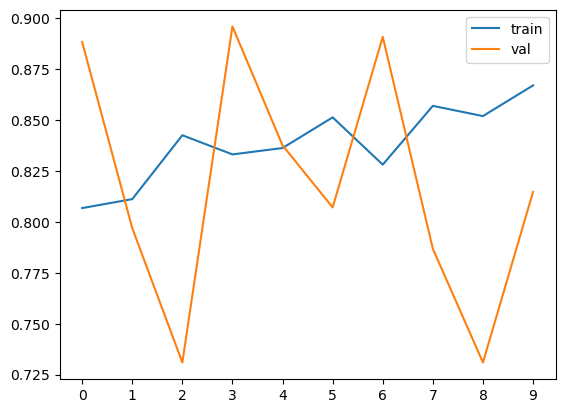

In [26]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Q5 What is the mean of test loss for all the epochs for the model trained with augmentations

In [27]:
median_train = mean(history.history['val_loss'])
round(median_train, 2)

0.42

### Q6 What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [28]:
median_train = mean(history.history['val_accuracy'][5:10])
round(median_train, 2)

0.81